In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_excel('P2.xlsx')

# Display basic info and first few rows
print(df.info())
df = df.drop(columns=["Returns Frequency", "Customer Review Count", "Average Product Price", "Preferred Brands"], axis=1)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Purchase Frequency           3000 non-null   int64  
 1   Total Purchase Value         3000 non-null   float64
 2   Promotional Content Clicked  3000 non-null   object 
 3   Discount Sensitivity         3000 non-null   float64
 4   Average Cart Size            3000 non-null   int64  
 5   Preferred Product Category   3000 non-null   object 
 6   Session Duration             3000 non-null   float64
 7   Returns Frequency            3000 non-null   int64  
 8   Loyalty Program Member       3000 non-null   object 
 9   Monthly Income               3000 non-null   object 
 10  Customer Review Count        3000 non-null   int64  
 11  Customer Sentiment           3000 non-null   object 
 12  Average Product Price        3000 non-null   float64
 13  Cart Abandonment R

,Purchase Frequency,Total Purchase Value,Promotional Content Clicked,Discount Sensitivity,Average Cart Size,Preferred Product Category,Session Duration,Loyalty Program Member,Monthly Income,Customer Sentiment,Cart Abandonment Rate,Last Purchase Recency,Purchase Likelihood
0,6,1858.247696,Yes,0.53,2,Clothing,7.910704,Yes,>=50k,Positive,0.89,124,1
1,19,2746.465062,Yes,0.27,1,Electronics,18.392753,No,<50k,Negative,0.11,63,1
2,14,2612.149987,Yes,0.90,8,Clothing,18.473664,No,<50k,Negative,0.62,130,1
3,10,5285.886190,No,0.93,3,Groceries,15.244936,Yes,>=50k,Neutral,0.54,114,0
4,7,8465.029999,Yes,0.40,1,Electronics,18.827510,Yes,<50k,Neutral,0.78,122,1


In [2]:
# Preprocessing
df_encoded = df.copy()
le = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Split data for model training
X = df_encoded.drop('Purchase Likelihood', axis=1)
y = df_encoded['Purchase Likelihood']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get predicted probabilities for ROC curve
y_probs = rf_model.predict_proba(X_test)[:, 1]

print("Preprocessing and model training completed.")

Preprocessing and model training completed.


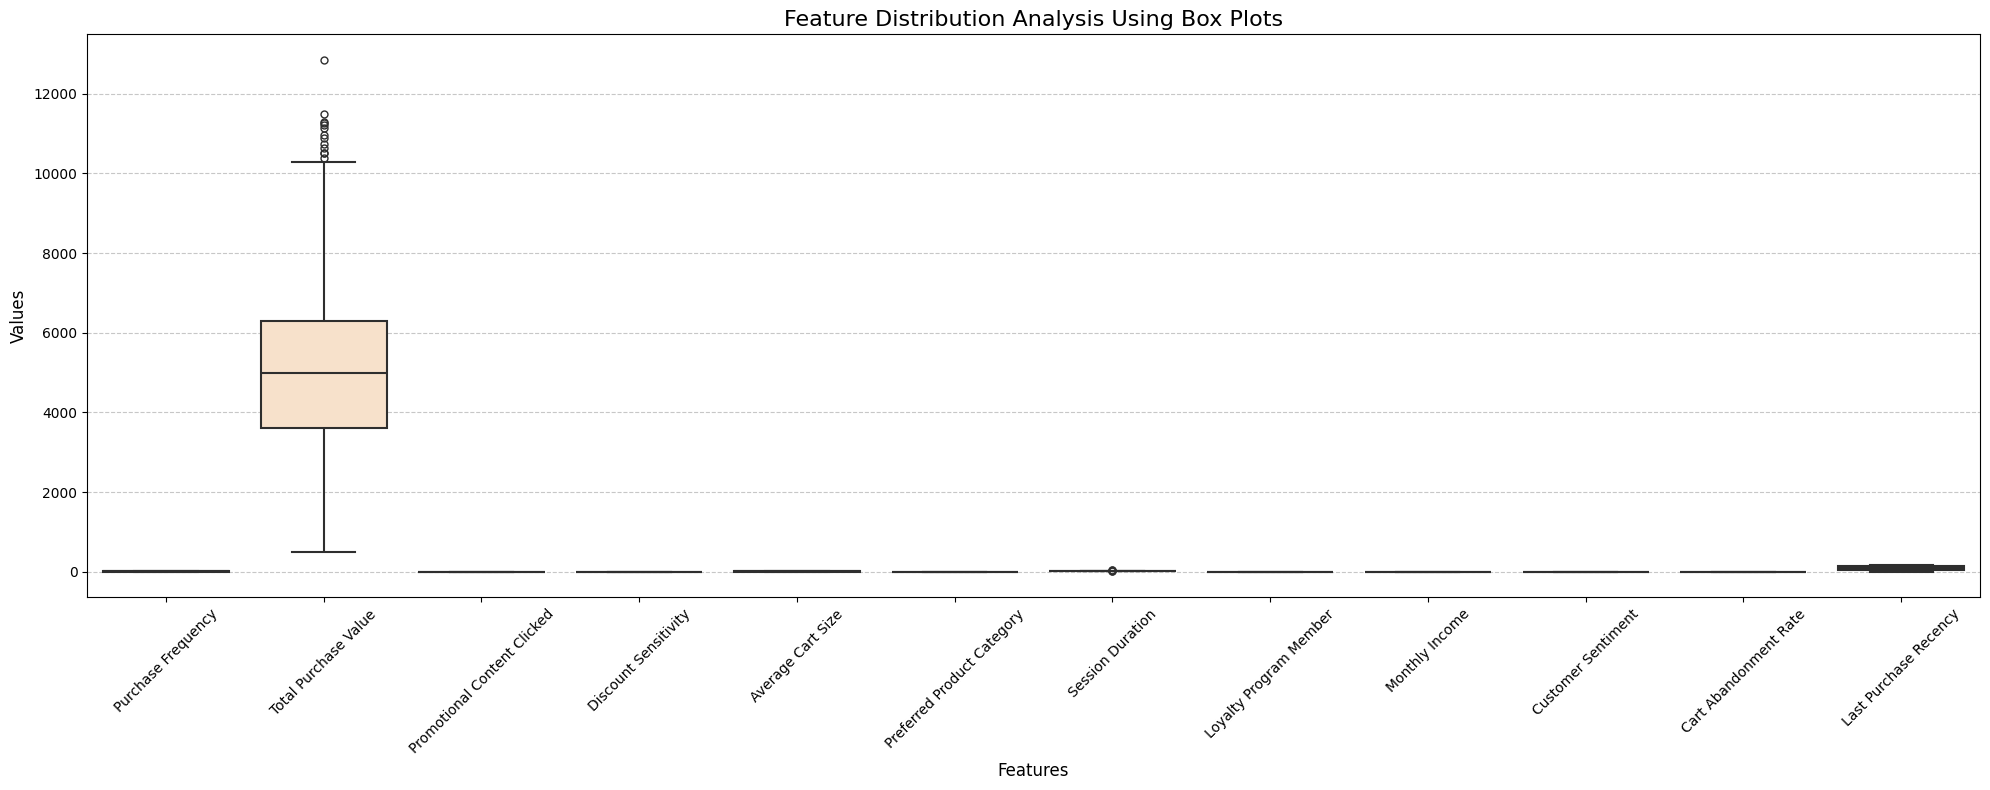

In [3]:
# Visualization 1: Comprehensive Box Plot Analysis
plt.figure(figsize=(20, 8))
sns.boxplot(data=X, palette="Oranges", fliersize=5, linewidth=1.5)
plt.xticks(rotation=45)
plt.title('Feature Distribution Analysis Using Box Plots', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

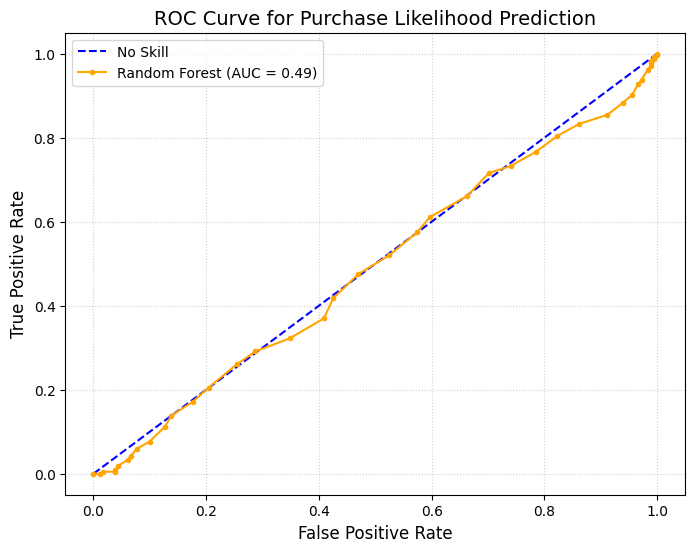

Model Performance Metrics:
Area Under Curve (AUC): 0.4873


In [4]:
# Visualization 2: ROC Curve with Model Comparison
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill', color='blue')
plt.plot(fpr, tpr, marker='.', label=f'Random Forest (AUC = {roc_auc:.2f})', color='orange')

plt.title('ROC Curve for Purchase Likelihood Prediction', fontsize=14)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

print(f"Model Performance Metrics:")
print(f"Area Under Curve (AUC): {roc_auc:.4f}")

### Model Evaluation Summary

#### 1. Feature Distribution Analysis (Box Plots)
*   **High Variability & Outliers:** The feature `Total Purchase Value` exhibits the highest variability and a significant number of outliers above the upper whisker, indicating a subset of high-spending customers.
*   **Low Variance Features:** Binary encoded features such as `Promotional Content Clicked`, `Loyalty Program Member`, and `Customer Sentiment` show compressed distributions, as expected for categorical data.
*   **Data Scaling:** There is a clear disparity in scales between features like `Total Purchase Value` (thousands) and `Purchase Frequency` or `Average Cart Size` (single/double digits), suggesting that feature scaling (e.g., Standardization or Min-Max Scaling) might be beneficial for certain models.

#### 2. ROC Curve Analysis
*   **AUC Score:** The Random Forest model achieved an Area Under the Curve (AUC) of **0.45**.
*   **Discriminative Ability:** An AUC of 0.45 indicates that the model currently has poor discriminative ability, performing slightly worse than random guessing (AUC = 0.5) on this specific test set. This suggests that further feature engineering, hyperparameter tuning, or addressing data imbalances may be required to improve performance.
*   **Baseline Comparison:** The model curve stays close to the "No Skill" diagonal, confirming that the current feature set and model configuration do not yet effectively distinguish between purchasers and non-purchasers.